# Decision Trees 

In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making.

A decision tree is drawn upside down with its root at the top.
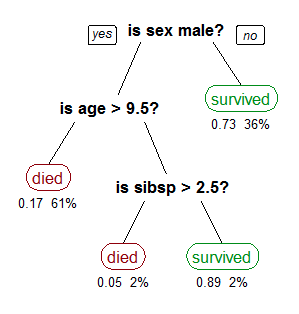
The bold text in black represents a condition/internal node, based on which the tree splits into branches/ edges. 
The end of the branch that doesn’t split anymore is the decision/leaf, in this case, whether the passenger died or survived, represented as red and green text respectively.

=> A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continues value).

In a Tree, the feature importance is clear and relations can be viewed easily. 
- This methodology is more commonly known as learning decision tree from data and above tree is called Classification tree as the target is to classify passenger as survived or died. 
- Regression trees are represented in the same manner, just they predict continuous values like price of a house

### The reasons have to choose Decision tree 

- Decision tress often mimic the human level thinking so its so simple to understand the data and make some good interpretations.
- Decision trees actually make you see the logic for the data to interpret

### How to make Decision tree 

#### 1. Entropy

Entropy is denoted by H(S) for a finite set S, is the measure of the amount of uncertainty or randomness in data.
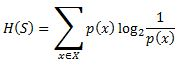
- Entropy tells us about the predictability of a certain event
    - High entropy => low predictability
    - Low entropy => high predictability

Example, consider a coin toss whose probability of heads is 0.5 and probability of tails is 0.5. Here the entropy is the highest possible, since there’s no way of determining what the outcome might be.

#### 2. Information Gain

Information gain denoted by IG(S,A) for a set S is the effective change in entropy after deciding on a particular attribute A.  It measures the relative change in entropy with respect to the independent variables.


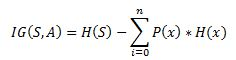

where IG(S, A) is the information gain by applying feature A. H(S) is the Entropy of the entire set, while the second term calculates the Entropy after applying the feature A, where P(x) is the probability of event x.

 => Information gain is a measure of the change in entropy.

ID3 Algorithm will perform following tasks recursively

1. Create root node for the tree
2. If all examples are positive, return leaf node ‘positive’
3. Else if all examples are negative, return leaf node ‘negative’
4. Calculate the entropy of current state H(S)
5. For each attribute, calculate the entropy with respect to the attribute ‘x’ denoted by H(S, x)
6. Select the attribute which has maximum value of IG(S, x)
7. Remove the attribute that offers highest IG from the set of attributes
8. Repeat until we run out of all attributes, or the decision tree has all leaf nodes.

Examples:
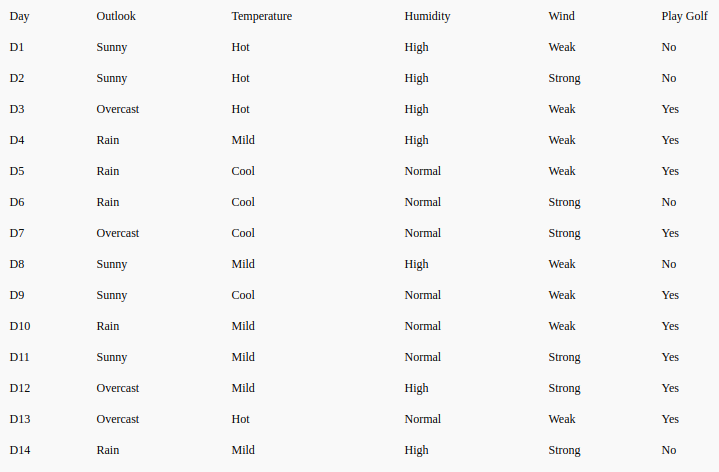

Now we’ll go ahead and grow the decision tree. The initial step is to calculate H(S), the Entropy of the current state. In the above example, we can see in total there are 5 No’s and 9 Yes’s.
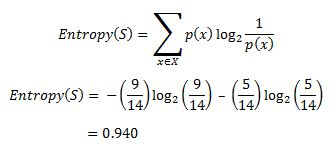

Entropy = 0.94 => the distribution is fairly random.

The next step is to choose the attribute that gives us highest possible Information Gain which we’ll choose as the root node.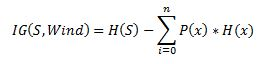
where ‘x’ are the possible values for an attribute. Here, attribute ‘Wind’ takes two possible values in the sample data, hence x = {Weak, Strong}

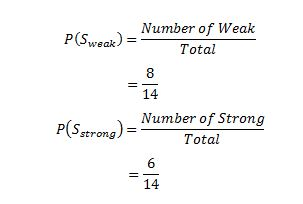

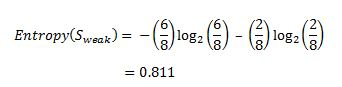

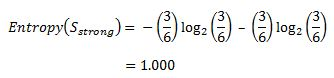

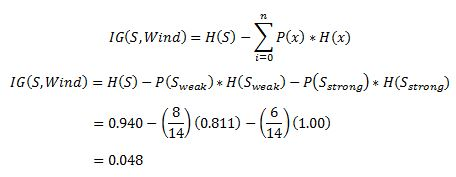

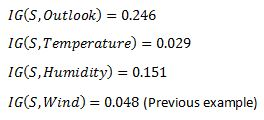

We can clearly see that IG(S, Outlook) has the highest information gain of 0.246, hence we chose Outlook attribute as the root node. At this point, the decision tree looks like.

Repeat these job until reach the final tree

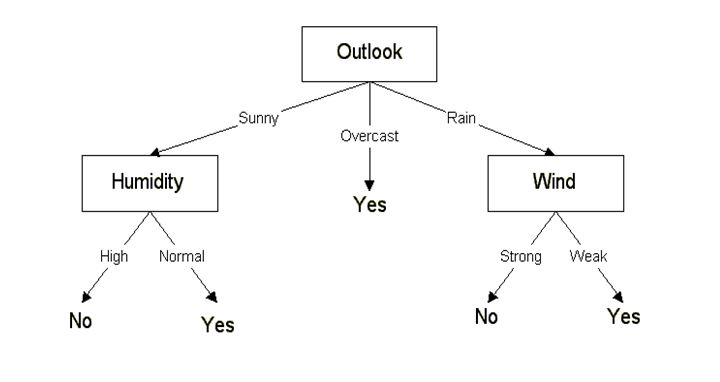

In [16]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image, display
__author__ = "Mayur Kulkarni <mayur.kulkarni@xoriant.com>"
 
def train_model(iris):
    """
    Train decision tree classifier
 
    :param iris:    iris data set instance
    :return:        classifier instance
    """
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(iris.data, iris.target)
    return clf
  
def display_image(clf, iris):
    """
    Displays the decision tree image
 
    :param clf:     classifier instance
    :param iris:    iris data set instance
    """
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names,
                                    filled=True, rounded=True)
 
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(data=graph.create_png()))

    

In [17]:
# !pip install pydotplus

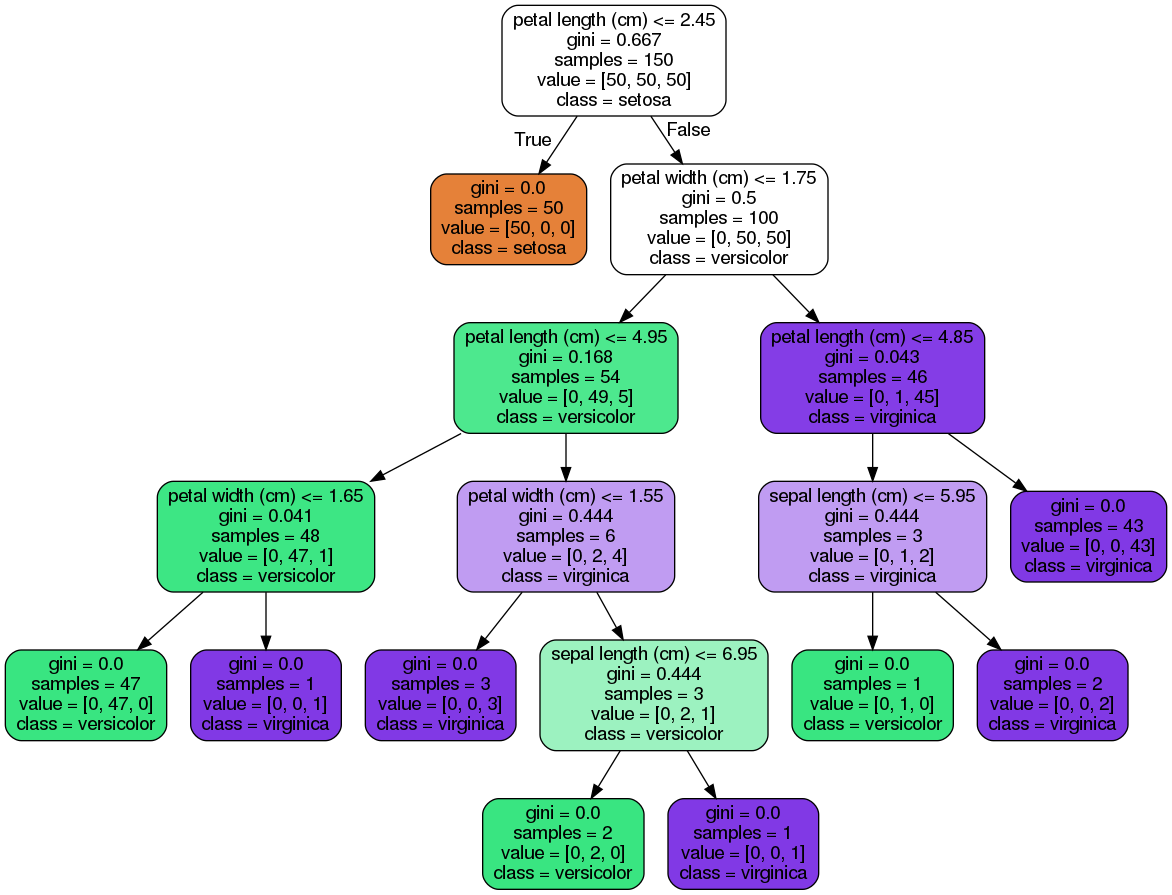

In [18]:
iris_data = load_iris()
decision_tree_classifier = train_model(iris_data)
display_image(clf=decision_tree_classifier, iris=iris_data)